In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import cv2 as cv
from utils.io_utils import get_images, output_calib_results, draw_detections
from utils.calib_utils import detect_keypoints, get_calib_input

In [8]:
pattern_size = (8, 6)
edge_length = 0.055
data_path = "/home/konstantin/datasets/bandeja-sequence/2021_02_17/2021-02-17-16-07-15_chessboard_plane/smartphone_video_frames"

In [9]:
images = get_images(data_path, period=8)

In [10]:
len(images)

226

In [11]:
results = detect_keypoints(images, pattern_size, edge_length)

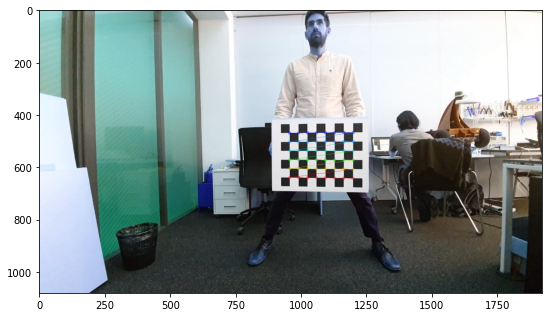

In [12]:
draw_detections(images, results, pattern_size, 0, normalize=True)

In [13]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.0001)

scene_points, loc_kp = get_calib_input(results)

shape = images[list(images.keys())[0]].shape[::-1][1:]

# Note: K3 dist. coeff. is set to zero, because ros requires 4 distortion parameters. Change if needed.
reproj_error, intrinsics, dist_coeff, _, _ = cv.calibrateCamera(scene_points, loc_kp, shape, None, None, flags=cv.CALIB_FIX_K3, criteria=criteria)

print(reproj_error)

0.1237238140068608


Intrinsics:
[[760.18287332   0.         964.72016236]
 [  0.         763.86162832 549.91277011]
 [  0.           0.           1.        ]]
Distortion coefficients:
[[-0.06298466  0.15540413  0.00111871 -0.00070079  0.        ]]
Undistored intrinsics: 
[[890.49127197   0.         959.62396931]
 [  0.         768.30633545 549.75867165]
 [  0.           0.           1.        ]]
Saved calibration results as calib_output/s10_intrinsics.npy


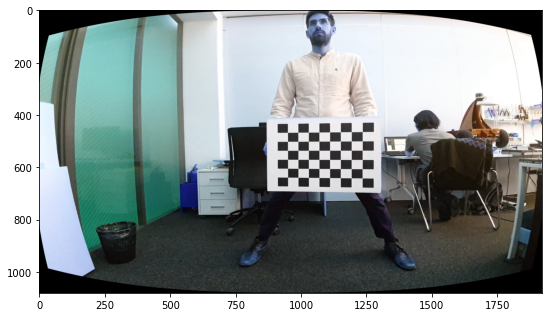

In [14]:
calib_name = 's10'
output_calib_results(intrinsics, dist_coeff, shape, images, 0, calib_name)